In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import collections
import pandas as pd
import numpy as np
import os


#[-]File to Load
#jupyter does not recognize __file__ adding this to avoid
#rewriting the code if it gets exported
try:
    __thisdir__ = os.path.dirname(os.path.abspath(__file__))
except NameError as error:
    __thisdir__ = "."

__csv_path_city__ = os.path.join(__thisdir__,"data","city_data.csv")
__csv_path_ride__ = os.path.join(__thisdir__,"data","ride_data.csv")

# Read the City and Ride Data
city_data = pd.read_csv(__csv_path_city__)
ride_data = pd.read_csv(__csv_path_ride__)

# Combine the data into a single dataset
pyber_data = pd.merge(ride_data,city_data,on="city",how='outer')

# Display the data table for preview
pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


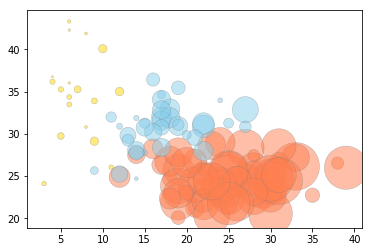

In [27]:
#Named tutple used for the data frame and plotting
__PyberData__ = collections.namedtuple('__PyberData__',
                                       ['avg',
                                        'rides',
                                        'drivers',
                                        'type'])

PyberData = __PyberData__("Average Fare ($) Per City",
                          "Number of rides per city",
                          "Total Number of Drivers (Per City)",
                          "Type")

#Data manipulation for further plotting
#[-]Average Fare ($) Per City
avg_per_city = round(pyber_data.groupby("city").mean()["fare"],2)
#[-]Total Number of Rides Per City
total_rides = pyber_data.groupby("city").count()["ride_id"]
#[-]Total Number of Drivers Per City
total_driver = pyber_data.groupby("city").sum()["driver_count"]
#[-]Color 
type_city = pd.DataFrame(pyber_data[["city","type"]])
type_city.drop_duplicates(inplace=True)
type_city.set_index("city", inplace=True)
ride_type = type_city["type"]
#Data frame creation
#Create a data frame that encapsulate all the information
city_info_df = pd.DataFrame({PyberData.avg:avg_per_city,
                             PyberData.rides:total_rides,
                             PyberData.drivers:total_driver,
                             PyberData.type:ride_type})
#Figure for the plot
bubbles_mpl = plt.figure

#Creates a dictionary to store color settings
plot_color_cfg = {"Urban": "Coral",
                  "Suburban": "SkyBlue",
                  "Rural":"Gold"}

for ride_type, color in  plot_color_cfg.items():
    #Creat ethe query to get the data
    query = f"Type == \"{ride_type}\""
    #query the data
    temp_df = city_info_df.query(query)
    plt.scatter(x=temp_df[PyberData.rides],
                y=temp_df[PyberData.avg],
                s=temp_df[PyberData.drivers],                                        
                c=color,
                label=ride_type,
                alpha=0.5,
                edgecolor="grey",
                linewidth=0.5)


## Bubble Plot of Ride Sharing Data

In [ ]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [ ]:
N = 45
x, y = np.random.rand(2, N)
c = np.random.randint(1, 5, size=N)
s = np.random.randint(10, 220, size=N)

fig, ax = plt.subplots()

scatter = ax.scatter(x, y, c=c, s=s)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

# produce a legend with a cross section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")

plt.show()

## Total Fares by City Type

In [ ]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


In [ ]:
# Show Figure
plt.show()